In [1]:
import numpy as np
import sklearn
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import pandas as pd




In [2]:
dat1 = np.genfromtxt("docword.kos.txt.gz", delimiter = "", skip_header= 3, dtype = int)
m1 = np.zeros((3430, 6906), dtype = int)


for p in dat1:
    m1[p[0]-1][p[1]-1] = p[2]
m1


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
jm = pairwise_distances(m1, metric='jaccard')
js = 1 - jm
js


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.06666667, 0.03539823, ..., 0.04216867, 0.01910828,
        0.0295858 ],
       [0.06666667, 1.        , 0.06285714, ..., 0.03305785, 0.02752294,
        0.02439024],
       [0.03539823, 0.06285714, 1.        , ..., 0.03108808, 0.03333333,
        0.02564103],
       ...,
       [0.04216867, 0.03305785, 0.03108808, ..., 1.        , 0.26262626,
        0.02962963],
       [0.01910828, 0.02752294, 0.03333333, ..., 0.26262626, 1.        ,
        0.28571429],
       [0.0295858 , 0.02439024, 0.02564103, ..., 0.02962963, 0.28571429,
        1.        ]])

In [ ]:
dfra = pd.DataFrame(js)
dfra




,0,1,2,3,4,5,6,7,8,9,...,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429
0,1.000000,0.066667,0.035398,0.042781,0.080717,0.039062,0.061350,0.037037,0.222222,0.029851,...,0.038043,0.045455,0.043478,0.028369,0.046667,0.072993,0.076271,0.042169,0.019108,0.029586
1,0.066667,1.000000,0.062857,0.027972,0.048913,0.049383,0.068376,0.033708,0.054054,0.084337,...,0.051471,0.031674,0.073171,0.077778,0.058252,0.064516,0.067568,0.033058,0.027523,0.024390
2,0.035398,0.062857,1.000000,0.032710,0.051181,0.039216,0.047368,0.050633,0.043716,0.025000,...,0.038278,0.696629,0.043210,0.036364,0.033898,0.054878,0.033784,0.031088,0.033333,0.025641
3,0.042781,0.027972,0.032710,1.000000,0.157360,0.016949,0.032258,0.024194,0.013333,0.024590,...,0.034884,0.035433,0.023973,0.031250,0.028571,0.030769,0.017857,0.032258,0.027972,0.032051
4,0.080717,0.048913,0.051181,0.157360,1.000000,0.031056,0.072917,0.061350,0.076087,0.023952,...,0.041860,0.065517,0.061538,0.022989,0.049724,0.052632,0.052632,0.051020,0.043243,0.056122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.072993,0.064516,0.054878,0.030769,0.052632,0.090909,0.098039,0.097222,0.130435,0.040541,...,0.023622,0.053922,0.032922,0.090909,0.142857,1.000000,0.346939,0.066667,0.076087,0.066038
3426,0.076271,0.067568,0.033784,0.017857,0.052632,0.106383,0.108434,0.092593,0.105263,0.036364,...,0.028037,0.031746,0.031250,0.066667,0.101449,0.346939,1.000000,0.121951,0.053333,0.056818
3427,0.042169,0.033058,0.031088,0.032258,0.051020,0.031579,0.045455,0.029412,0.031746,0.009804,...,0.026316,0.029915,0.037453,0.047619,0.060870,0.066667,0.121951,1.000000,0.262626,0.029630
3428,0.019108,0.027523,0.033333,0.027972,0.043243,0.062500,0.024590,0.045455,0.035398,0.022727,...,0.036232,0.036364,0.023256,0.043011,0.048077,0.076087,0.053333,0.262626,1.000000,0.285714


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
arr = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,algorithm = "full",random_state=0,max_iter = 60).fit(js)
  arr.append(kmeans.inertia_)




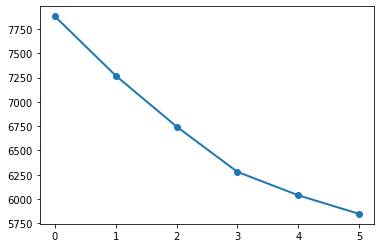

In [ ]:
plt.plot(arr,linewidth = 2,marker='o')
plt.show()

In [8]:
from sklearn.decomposition import PCA
# pca = PCA(2)
# data = pca.fit_transform(x)
centroids = KMeans(n_clusters=4,algorithm = "full",random_state=0,max_iter = 60).fit(js).cluster_centers_


In [11]:
centroids

array([[0.04080092, 0.03271436, 0.04187236, ..., 0.02764989, 0.03431379,
        0.04081186],
       [0.03916985, 0.02199032, 0.37822111, ..., 0.02922582, 0.02409197,
        0.02514349],
       [0.03131265, 0.0265843 , 0.02384883, ..., 0.02519837, 0.02569422,
        0.03206048],
       [0.04112119, 0.0246477 , 0.45527573, ..., 0.03068503, 0.02649442,
        0.02775231]])

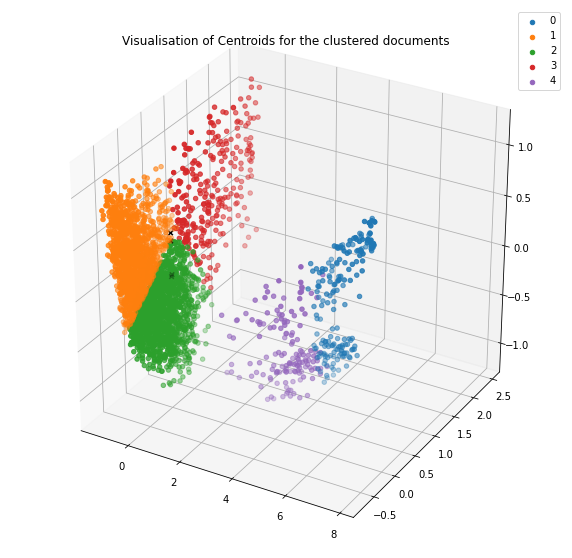

In [12]:

from sklearn.decomposition import PCA
# ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

#Centroids Visualisation
pca = PCA(n_components = 3)
data = pca.fit_transform(js)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
ax = plt.axes(projection ="3d")

for i in uniq:
   ax.scatter(data[label == i , 0] , data[label == i , 1] ,data[label == i,2],label = i)
ax.scatter(centroids[:,0], centroids[:,1],centroids[:,2], marker="x", color='k')

# #This is done to find the centroid for each clusters.
plt.legend()
plt.title("Visualisation of Centroids for the clustered documents")

plt.show()


In [14]:
from sklearn.metrics import davies_bouldin_score
dav = KMeans(n_clusters=4,algorithm = "full",random_state=0,max_iter = 60).fit(js)
davies_bouldin_score(js,labels = dav.fit_predict(js))

2.09523194145207

In [18]:
import time
t1 = time.perf_counter()
dav = KMeans(n_clusters=4,algorithm = "full",random_state=0,max_iter = 60).fit(js)
tw = time.perf_counter() - t1
print(tw, "seconds")

7.407635500999959 seconds


In [25]:
from memory_profiler import profile
%load_ext memory_profiler

%memit dav=KMeans(n_clusters=3,random_state=42).fit(js)

peak memory: 823.94 MiB, increment: 0.04 MiB
